In [1]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x, y = sp.symbols('x, y')
def f(x, y):
    return ((x**2)/2)+(7*(y**2)/2)
f(x,y)

x**2/2 + 7*y**2/2

In [32]:
%matplotlib inline
plt.rc('figure', figsize = (12, 9))

In [4]:
a = 50
e1, e2 = np.linspace(-10, 10, a), np.linspace(-10, 10, a)
e1, e2 = np.meshgrid(e1, e2)

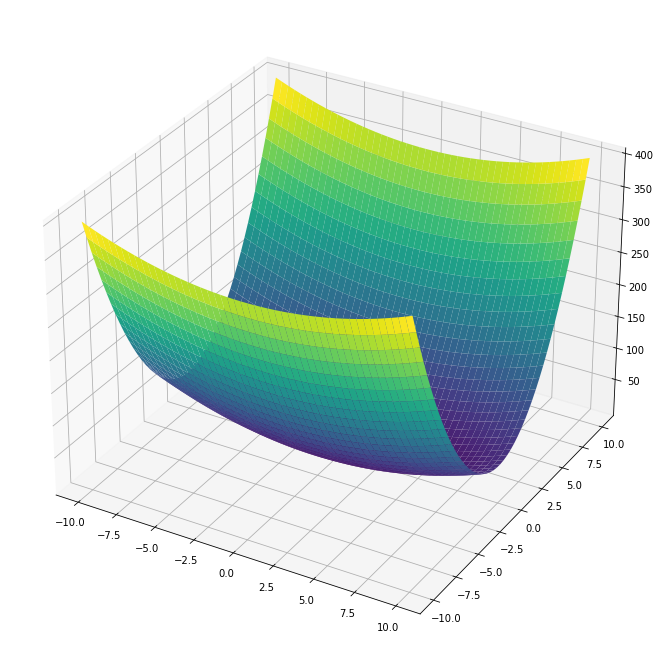

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(e1, e2, f(e1, e2), cmap = plt.cm.viridis)

In [6]:
f(x,y).subs([(x, 7), (y, 1.5)])

32.3750000000000

In [7]:
def gradient(function, args):
    Lf = []
    for var in args:
        Lf.append(function.diff(var))
    return sp.Matrix(Lf)

In [8]:
gradient(f(x,y), (x,y))

Matrix([
[  x],
[7*y]])

In [9]:
def fixedStep(function, args, step, point, e = 10**(-5), nbr=100):
    Lf = gradient(function, args) #calcul du gradient de la fonction
    X = sp.Matrix(point) #X[0] est le point de depart
    k = 0
    
    while (k < nbr):
        precedent = [] #X[k]
        for i in range(len(args)):
            precedent.append((args[i], X[i])) #creer une liste de substitution avec X[k]
        
        grad = [] #Lf(X[k])
        for expr in Lf:
            grad.append(expr.subs(precedent)) #calcul des coordonees de Lf(X[k])
        grad = sp.Matrix(grad)
        
        if grad.norm() < e: #arreter si ||lf(X[k])|| < precision
            break
        
        X = sp.Matrix(X - step*grad) #calcul de X[k+1] = X[k]-s*Lf(X[k])
        k += 1
        
        
    return X #retour du dernier X[k]

In [10]:
fixedStep(f(x,y), (x,y), 0.2, [7, 1.5], 10**(-5))

Matrix([
[  8.58197502884897e-6],
[-7.97536797470959e-25]])

In [11]:
def s(x, y):
    return (x**2 + ((7**2)*(y**2))) / (x**2 + ((7**3)*(y**2)))
s(x,y)

(x**2 + 49*y**2)/(x**2 + 343*y**2)

In [12]:
def optimalStep(function, args, stepFunction, point, e = 10**(-5), nbr=100):
    Lf = gradient(function, args) #calcul du gradient de la fonction
    X = sp.Matrix(point) #X[0] est le point de depart
    
    k = 0
    while (k < nbr):
        precedent = [] #X[k]
        for i in range(len(args)):
            precedent.append((args[i], X[i])) #creer une liste de substitution avec X[k]
        
        grad = [] #Lf(X[k])
        for expr in Lf:
            grad.append(expr.subs(precedent)) #calcul des coordonees de Lf(X[k])
        grad = sp.Matrix(grad)
        
        if grad.norm() < e: #arreter si ||lf(X[k])|| < precision
            break
        
        s = stepFunction.subs(precedent) #calcul du pas S[k] en fonction X[k]
        X = sp.Matrix(X - s*grad) #calcul de X[k+1] = X[k]-S[k]*Lf(X[k])
        k += 1
        
    return X #retour du dernier X[k]"

In [13]:
optimalStep(f(x,y), (x,y), s(x,y), [7, 1.5], 10**(-5))

Matrix([
[ 6.85985549474889e-6],
[-6.53319570928465e-7]])

In [14]:
def hessian(function, args):
    Hf = []
    for i in args:
        line = []
        for j in args:
            line.append(function.diff(j).diff(i))
        Hf.append(line)
    return sp.Matrix(Hf)

In [15]:
hessian(f(x,y), (x,y))

Matrix([
[1, 0],
[0, 7]])

In [16]:
def newtonDirection(function, args):
    Hf = hessian(function, args) #calcul de la hessiene de la fonction
    Lf = gradient(function, args) #calcul du gradient de la fonction

    U = sp.symbols("u:"+str(len(args))) #creation des variables pour le systeme lineaire Hf*U = -Lf
    U = sp.Matrix(U)

    A = Hf*U + Lf #calcul de la matrice augmentée Hf*U + Lf
    solution = sp.solve(A, U) #calcul des solution du system lineaire A = 0 

    D = [] #vecteur de la direction de newton
    for u in U:
        D.append(solution[u]) #passer les valeurs de la solution au vecteur de newton
    D = sp.Matrix(D)

    return D #retour du vecteur de newton"

In [17]:
newtonDirection(f(x,y), (x,y))

Matrix([
[-x],
[-y]])

In [18]:
def localNewton(function, args, point, e = 10**(-5), nbr=100):
    Lf = gradient(function, args) #calcul du gradient de la fonction
    DNf = newtonDirection(function, args) #calcul de la direction de newton de la fonction
    X = sp.Matrix(point) #X[0] est le point de depart
    
    k = 0
    while (k < nbr):
        precedent = [] #X[k]
        for i in range(len(args)):
            precedent.append((args[i], X[i])) #creer une liste de substitution avec X[k]

        grad = [] #Lf(X[k])
        for expr in Lf:
            grad.append(expr.subs(precedent)) #calcul des coordonees de Lf(X[k])
        grad = sp.Matrix(grad)
        
        if grad.norm() < e: #arreter si ||lf(X[k])|| < precision
            break
            
        d = [] #DNf(X[k])
        for expr in DNf:
            d.append(expr.subs(precedent)) #calcul des coordonees de DNf(X[k])
        d = sp.Matrix(d)

        X = sp.Matrix(X + d) #calcul de X[k+1] = X[k]+D[k]
        k += 1
        
    return X #retour du dernier X[k]

In [19]:
localNewton(f(x,y), (x,y), [7, 1.5], 10**(-5))

Matrix([
[0],
[0]])

In [20]:
def g(x, y):
    return [2*x - x*y, 2*x*y - 3*y]

def h(x,y): 
    return sp.Matrix(g(x,y))

h(x,y)

Matrix([
[ -x*y + 2*x],
[2*x*y - 3*y]])

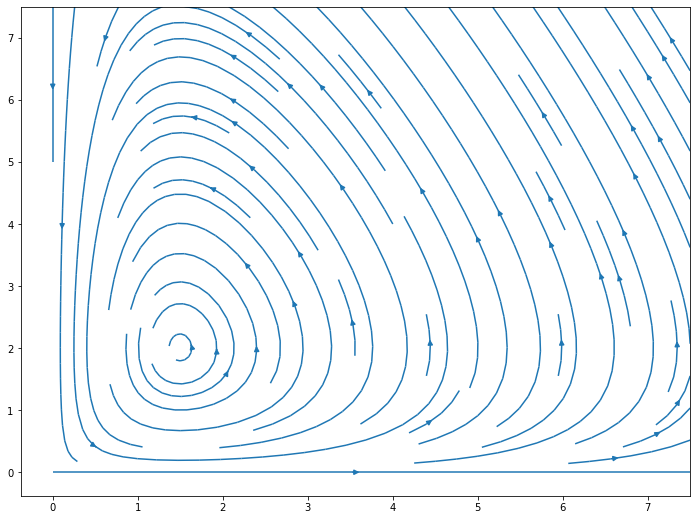

In [21]:
a = 50
e1, e2 = np.linspace(0, 7.5, a), np.linspace(0, 7.5, a)
e1, e2 = np.meshgrid(e1, e2)
U = g(e1,e2)[0]
V = g(e1,e2)[1]
plt.streamplot(e1, e2, U, V)

In [22]:
def jacobian(function, args):
    function = sp.Matrix([function])
    Jf = []
    
    for fi in function:
        inter = []
        for xj in args:
            inter.append(fi.diff(xj))
        Jf.append(inter)

    return sp.Matrix(Jf)

In [23]:
jacobian(h(x,y), (x,y))

Matrix([
[2 - y,      -x],
[  2*y, 2*x - 3]])

In [24]:
def gaussDirection(function, args):
    function = sp.Matrix(function)
    Jf = jacobian(function, args)
    
    U = sp.symbols("u:"+str(len(args)))#creation des variables pour le systeme lineaire T(Jf)*Jf*U = -T(Jf)*f
    U = sp.Matrix(U)

    A = sp.transpose(Jf)*Jf*U + sp.transpose(Jf)*function #calcul de la matrice augmentée: T(Jf)*Jf*U + T(Jf)*f
    solution = sp.solve(A, U) #calcul des solution du system lineaire A = 0
    
    D = [] #vecteur de la direction de gauss
    for u in U:
        if(u in solution):
            D.append(solution[u]) #passer les valeurs de la solution au vecteur de gauss
        else: D.append(u)
    D = sp.Matrix(D)

    return D #retour du vecteur de gauss

In [25]:
gaussDirection(h(x,y), (x,y))

Matrix([
[-2*x*(2*x - 3)/(4*x + 3*y - 6)],
[  -3*y*(y - 2)/(4*x + 3*y - 6)]])

In [26]:
def gaussNewton(function, args, point, e = 10**(-5), nbr=100):
    Jf = jacobian(function, args) #calcul du jacobien de la fonction
    DGf = gaussDirection(function, args) #calcul de la direction de gauss de la fonction
    X = sp.Matrix(point) #X[0] est le point de depart
    
    k = 0
    while (k < nbr):
        precedent = [] #X[k]
        for i in range(len(args)):
            precedent.append((args[i], X[i])) #creer une liste de substitution avec X[k]
        
        jacob = [] #Jf(X[k])
        for i in range(len(function)):
            line = []
            for j in range(len(args)):
                line.append(Jf[i*len(args)+j].subs(precedent)) #calcul des coordonees de Jf(X[k])
            jacob.append(line)
        jacob = sp.Matrix(jacob)
            
        d = [] #DGf(X[k])
        for expr in DGf:
            d.append(expr.subs(precedent)) #calcul des coordonees de DNf(X[k])
        d = sp.Matrix(d)
        
        if d.norm() < e: #arreter si ||lf(X[k])|| < precision
            break

        X = sp.Matrix(X + d) #calcul de X[k+1] = X[k]+D[k]
        k += 1
        
    return X #retour du dernier X[k]

In [27]:
gaussNewton(h(x,y), (x,y), [5, 5], 10**(-5)).evalf()

Matrix([
[1.50000140630756],
[2.00000187507675]])

In [28]:
def meriteFunction(function, args, s, direction):
    X = sp.Matrix(args)+(s*direction)
    values = []
    for i in range(len(args)):
        values.append((args[i], X[i]))
    
    PhiF = function.subs(values)
    return PhiF

In [29]:
def armijoStep(function, args, direction, Lf, e):
    s = sp.symbols('s')
    PhiF = meriteFunction(function, args, s, direction)
    C = PhiF - function + e*s*(sp.transpose(Lf)*direction)[0]
    CA = sp.solve(C, s)
    return sp.Matrix(CA)
    #return PhiF

In [30]:
def armijoGradientDescent(function, args, step, point, e = 10**(-4), nbr = 100):
    Lf = gradient(function, args) #calcul du gradient de la fonction
    X = sp.Matrix(point) #X[0] est le point de depart
    k = 0
    CA = armijoStep(function, args, -Lf, Lf, e)
    while (k < nbr):
        precedent = [] #X[k]
        for i in range(len(args)):
            precedent.append((args[i], X[i])) #creer une liste de substitution avec X[k]
        
        grad = [] #Lf(X[k])
        for expr in Lf:
            grad.append(expr.subs(precedent)) #calcul des coordonees de Lf(X[k])
        grad = sp.Matrix(grad)
        
        if grad.norm() < e: #arreter si ||lf(X[k])|| < precision
            break
        
        X = sp.Matrix(X - step*grad) #calcul de X[k+1] = X[k]-s*Lf(X[k])
        k += 1
        
        
    return CA

In [31]:
armijoGradientDescent(f(x,y), (x,y), 0.2, [7, 1.5])

Matrix([
[                                          0.0],
[2.0002*(x**2 + 49.0*y**2)/(x**2 + 343.0*y**2)]])